In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
# divide the dataframe into independent and dependent 
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [ ]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [ ]:
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
# feature encoding - OneHotEncoder
# A dense NumPy array stores all values, including 0s.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False), [3])],
    remainder='passthrough'
)

X = ct.fit_transform(X)  # This will be a clean dense NumPy array
  


# transformers=[ ... ] → list of transformations.
# 'encoder' → name of this transformation (just a label).
# OneHotEncoder() → the transformation to apply. and always return as sparse matrix as it save memory but we don't want it here so sparse = false
# [3] → index of the column you want to encode (here, 4th column because indexing starts at 0).
# remainder='passthrough' → keep the other columns as they are.

In [ ]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [ ]:
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
#train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
len(X_train)

40

In [ ]:
len(X_test)

10

In [ ]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# fit_transform(X_train) → Learn scaling parameters from training set & apply them.
# transform(X_test) → Apply same scaling to test set, no new learning.
# Purpose: Avoid data leakage and keep evaluation honest.

In [ ]:
# create Linear Regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# predictions
y_pred = regressor.predict(X_test)

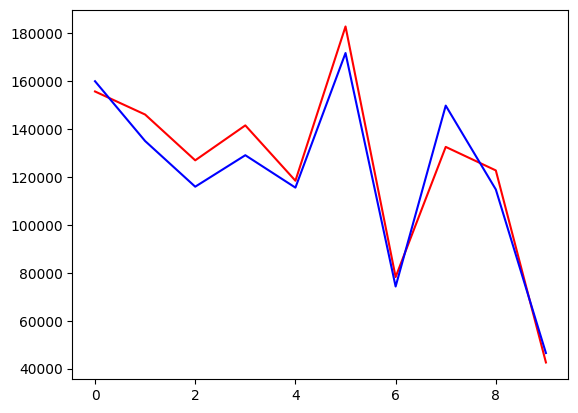

In [ ]:
plt.plot(Y_test, color = 'red', label = 'test')
plt.plot(y_pred, color = 'blue', label = 'predictions')
plt.show()

Out of the box predictions
[1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],

In [ ]:
data = [[1.0, 0.0, 0.0, 101000, 92000, 250000]]
new_data = pd.DataFrame(data)



In [ ]:
new_df = sc.transform(new_data)


In [ ]:
single = regressor.predict(new_df)
print(single)

[134047.24319603]


###  **Regression Metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
print(mae)

8588.1757525928


In [ ]:
mse = mean_squared_error(Y_test, y_pred)
print(mse)

94042937.39826277


In [ ]:
np.sqrt(mse)

np.float64(9697.573789266198)

In [ ]:
r2_score(Y_test, y_pred)

0.9333567119773588

### Multiple Linear Regression

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X, y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)
# You’re making 100 fake data points, each with 2 useful features, to train/test regression.
# Noise=50 makes the relationship imperfect, like real-world data.

In [ ]:
df = pd.DataFrame({'feature1':X[:,0], 'feature2':X[:,1], 'target':'y'})

In [ ]:
df.head()

,feature1,feature2,target
0,-0.085452,-0.393278,y
1,0.785748,-0.965151,y
2,0.713419,1.294683,y
3,0.122168,-1.730444,y
4,0.957057,-0.386235,y


In [ ]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([  59.79858843, -108.72103703,  -66.52480786,  260.2483776 ,
         43.43573469,  -21.09240301,   62.20693368,  379.48883995,
        106.04057527,  232.96791127,  318.25698908,  110.45511778,
        233.20799651,  -39.58691165,   12.79848755,   63.15580847,
       -330.9134784 , -149.68532392,   69.77380668, -191.53545433])

In [ ]:
Y_test

array([  79.76394206, -129.62000492,  -67.02722144,  241.53883186,
        145.02373321,  -54.05422708,   51.40218838,  404.27814491,
         76.03026445,  254.66839778,  295.43921584,  163.11094654,
        177.43124481,  -99.240357  ,  -19.15125072,   46.65115586,
       -321.19631   ,  -32.72200108,  106.34454153, -255.48310369])

In [ ]:
print('MAE: ', mean_absolute_error(y_pred, Y_test))
print('MSE: ', mean_squared_error(y_pred, Y_test))
print('RMSE ', np.sqrt(mean_squared_error(y_pred, Y_test)))
print("R2-Score: ", r2_score(Y_test, y_pred))

MAE:  37.42440082055106
MSE:  2257.634289481725
RMSE  47.51456923388578
R2-Score:  0.928184739902421


### Polynomial Regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [8]:
X = 6 * np.random.rand(200, 1)-3 # Now you’ve got 200 feature values randomly spread between -3 and +3.
y = 0.8*X**2 + 0.9*X + 2 + np.random.randn(200, 1) # This simulates a curved/parabolic dataset with some randomness — perfect to test if your model can handle non-linear regression.

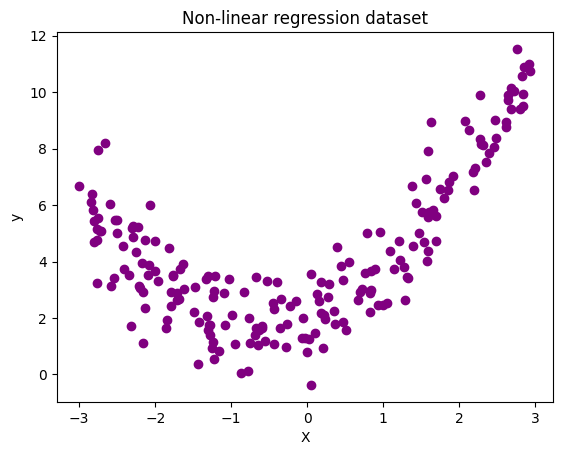

In [9]:
plt.scatter(X, y, color='purple')
plt.title("Non-linear regression dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=3)

In [12]:
#applying the linear regression model
lr = LinearRegression()
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred = lr.predict(X_test)
r2_score_lr = r2_score(Y_test, y_pred)
print("R2-Score is:", r2_score_lr)

R2-Score is: 0.12537112783809823


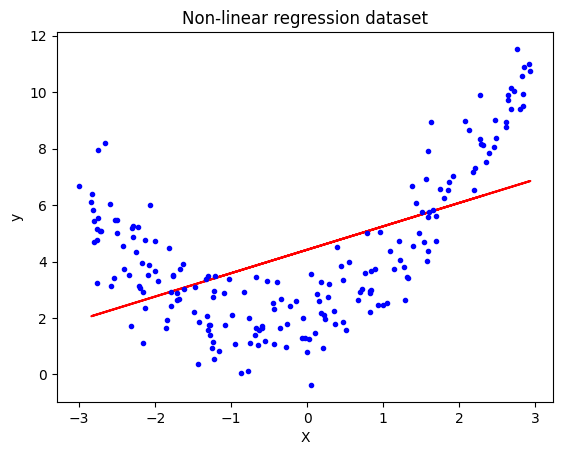

In [15]:
plt.plot(X_train, lr.predict(X_train), color ='r')
plt.plot(X, y, 'b.')
plt.title("Non-linear regression dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

**Applying Polynomial linear regression**

In [16]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)


In [17]:
print(X_train_trans[0])

[1.         2.31389326 5.354102  ]


In [18]:
print(X_train[0])

[2.31389326]


In [20]:
lr = LinearRegression()
lr.fit(X_train_trans, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = lr.predict(X_test_trans)

In [22]:
r2_score(Y_test, y_pred)

0.8386187174146731

In [ ]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1) # Think of np.linspace as a ruler that cuts a stick into equal pieces between two points, no matter the length.
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
# You trained your model on scattered real data points.
# Now you’re generating evenly spaced X values so that your prediction line looks smooth and continuous when plotted.

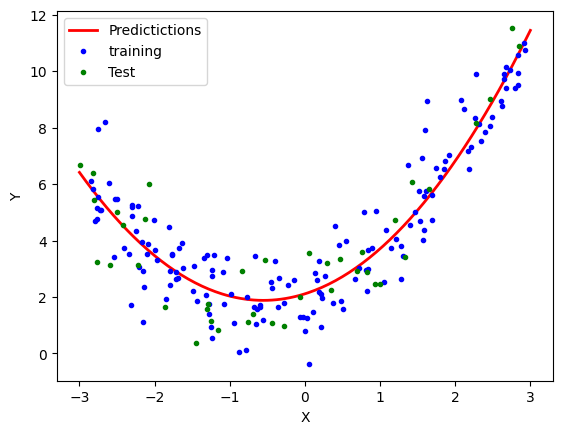

In [24]:
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = "Predictictions")
plt.plot(X_train, Y_train, 'b.', label = "training")
plt.plot(X_test, Y_test, "g.", label = "Test")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [25]:
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1) # Think of np.linspace as a ruler that cuts a stick into equal pieces between two points, no matter the length.
    X_new_poly = poly.transform(X_new)
    polybig_feature = PolynomialFeatures(degree=degree, include_bias= False)
    std_scalar = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_feature),
        ("std_scaler", std_scalar),
        ("lin_reg", lin_reg),
    ]
    )
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, 'r', label = "Degree" + str(degree), linewidth = 2)

    plt.plot(X_train, Y_train, 'b.', linewidth = 3)
    plt.plot(X_test, Y_test, 'g.', linewidth =3)
    plt.legend(loc = "upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

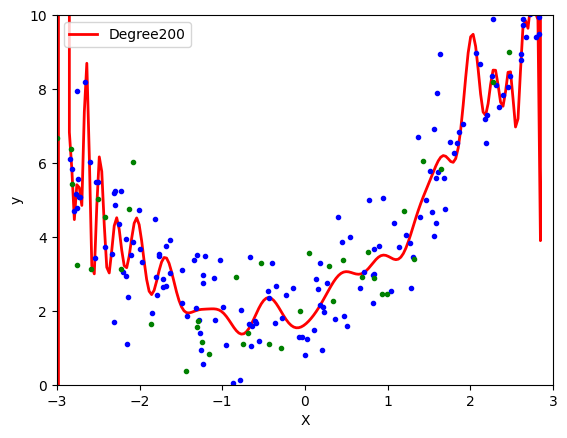

In [31]:
polynomial_regression(200)

In [32]:
poly.powers_

array([[0],
       [1],
       [2]])

Visualize the data using 3d-plot

In [34]:
# 3D ploynomial regression
X = 7*np.random.rand(100, 1)-2.8
y = 7*np.random.rand(100, 1)-2.8
z = X**2 + y**2 + 0.2*X + 0.2*y + 0.1*X*y + np.random.randn(100,1)


In [38]:
import plotly.express as px 
df = px.data.iris()
fig = px.scatter_3d(df, x = X.ravel(), y =y.ravel(), z= z.ravel())
fig.show()

In [41]:
class Solution(object):
    def validMountainArray(self, arr):
        n = len(arr)
        if n < 3:
            return False

        peak = arr.index(max(arr))

        # peak cannot be first or last
        if peak == 0 or peak == n - 1:
            return False

        # strictly increasing to the peak
        for i in range(peak):
            if arr[i] >= arr[i + 1]:
                return False

        # strictly decreasing after the peak
        for i in range(peak, n - 1):
            if arr[i] <= arr[i + 1]:
                return False

        return True
arr = [0, 2, 3, 4, 5, 2, 1, 0]
a1 = Solution()
print(a1.validMountainArray(arr))

True
